### Copyright 2022-2026 Jens Liebehenschel, Frankfurt University of Applied Sciences, FB2, Computer Science
### No liability or warranty; only for educational and non-commercial purposes
### See some basic hints for working with Jupyter notebooks in README.md
## Storing keys in a hash table with collision resolution using open addressing with linear probing and its visualization

## Constants

In [1]:
# the size of array in tests can be changed here
ARRAY_SIZE = 23
NUM_PROBES_QUAD = ARRAY_SIZE

# change output colors here
COL_FREE = 'yellowgreen'
COL_USED = 'sandybrown'
COL_INSERT_SUCCESS = 'mediumseagreen'
COL_INSERT_ERROR = 'tomato'
COL_HORIZ_LINES = 'lightgray'
COL_LAST_HORIZ_LINE = 'k'

# offset for matching array index and y-axis description in output
OFFSET = 0.5

# number of ticks on axes
NUM_X_TICKS = 10
NUM_Y_TICKS = 10

# graphical output: width of bars and size of fonts - two settings are given here
# use for good readability of fewer steps, e.g. 20-25
#BAR_WIDTH = 20
#FONTSIZE_LEGEND = 20
#FONTSIZE_ELEMENTS = 24
#FONTSIZE_AXES = 24
#FONTSIZE_AXES_LEGEND = 20
# use for good readability of more steps, e.g. 80-100
BAR_WIDTH = 8
FONTSIZE_LEGEND = 14
FONTSIZE_ELEMENTS = 14
FONTSIZE_AXES = 14
FONTSIZE_AXES_LEGEND = 14

## Insertion of keys into the hash table

In [2]:
# inserts k into the hash table using linear probing
# returns True if key was successfully inserted, False if no free place could be found, i.e. hash table is full
def insert_lin_probing(k):
    first_hash_value = k % ARRAY_SIZE
    if hash_table[first_hash_value] == None:
        hash_table[first_hash_value] = k
        return True
    else:
        next_position = (first_hash_value + 1) % ARRAY_SIZE
        while (hash_table[next_position] != None and next_position != first_hash_value):
            next_position = (next_position + 1) % ARRAY_SIZE
        if hash_table[next_position] == None:
            hash_table[next_position] = k
            return True
        else:
            return False

In [3]:
# inserts k into the hash table using quadratic probing
# returns True if key was successfully inserted, False if no free place could be found
def insert_quad_probing(k):
    first_hash_value = k % ARRAY_SIZE
    for i in range(NUM_PROBES_QUAD+1):
        next_position = (first_hash_value + i*i) % ARRAY_SIZE
        if hash_table[next_position] == None:
            hash_table[next_position] = k
            return True
    # no free position found
    return False

## Visualize states of the hash table

In [4]:
# plot one column of the graph, text and colors
def plot_step(step, x):
    # plot hash table
    for y, key in enumerate(step[0]):
        if key is None:
            plt.plot([x,x],[y-OFFSET, y+OFFSET], COL_FREE, linewidth=BAR_WIDTH, solid_capstyle="butt")
        else:
            plt.text(x, y, key, verticalalignment='center_baseline', horizontalalignment='center', fontsize=FONTSIZE_ELEMENTS)
            plt.plot([x,x],[y-OFFSET, y+OFFSET], COL_USED, linewidth=BAR_WIDTH, solid_capstyle="butt")
    # plot inserted key at the top
    if step[1] is not None:
        plt.text(x, ARRAY_SIZE, step[1], verticalalignment='center_baseline', horizontalalignment='center', fontsize=FONTSIZE_ELEMENTS)
        if step[2]:
            plt.plot([x,x],[ARRAY_SIZE-OFFSET, ARRAY_SIZE+OFFSET], COL_INSERT_SUCCESS, linewidth=BAR_WIDTH, solid_capstyle="butt")
        else:
            plt.plot([x,x],[ARRAY_SIZE-OFFSET, ARRAY_SIZE+OFFSET], COL_INSERT_ERROR, linewidth=BAR_WIDTH, solid_capstyle="butt")

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]

def output_graphical_view():
    # format graph
    plt.xticks(range(0, len(steps)+1, max(1,len(steps)//10)), fontsize=FONTSIZE_AXES)
    plt.yticks(range(0, ARRAY_SIZE, max(1,ARRAY_SIZE//10)), fontsize=FONTSIZE_AXES)
    plt.axis([-1, len(steps),-1, ARRAY_SIZE+1])
    plt.xlabel("Steps during insertion of keys", fontsize=FONTSIZE_AXES_LEGEND)
    plt.ylabel("Position in hash table", fontsize=FONTSIZE_AXES_LEGEND)
    
    for i, step in enumerate(steps):
        plot_step(step, i)
    
    # draw horitontal lines
    for i in range(ARRAY_SIZE+1):
        plt.hlines(xmin=-1, xmax=len(steps), y=i-OFFSET, color=COL_HORIZ_LINES)
    plt.hlines(xmin=-1, xmax=len(steps), y=ARRAY_SIZE-OFFSET, color=COL_LAST_HORIZ_LINE)
        
    # show plot
    plt.show()

## Legend for output

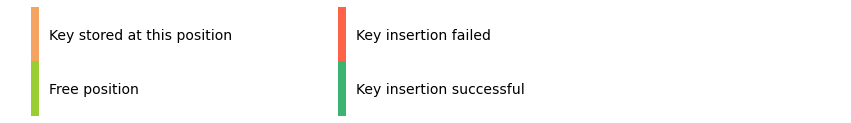

In [6]:
COLORS = [[COL_FREE,"Free position"], [COL_USED,"Key stored at this position"], 
          [COL_INSERT_SUCCESS,"Key insertion successful"], [COL_INSERT_ERROR,"Key insertion failed"]]
plt.figure(figsize=(15, 2))
plt.axis([0, 30, 0, 2])
plt.axis('off')
for i in range(2):
    plt.plot([1,1],[i,i+2*OFFSET], COLORS[i][0], linewidth=BAR_WIDTH, solid_capstyle="butt")
    plt.text(1+OFFSET, i+OFFSET, COLORS[i][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=FONTSIZE_LEGEND)
for i in range(2):
    plt.plot([12,12],[i,i+2*OFFSET], COLORS[i+2][0], linewidth=BAR_WIDTH, solid_capstyle="butt")
    plt.text(12+OFFSET, i+OFFSET, COLORS[i+2][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=FONTSIZE_LEGEND)
plt.show()

## Visualize insertion of keys into the hash table

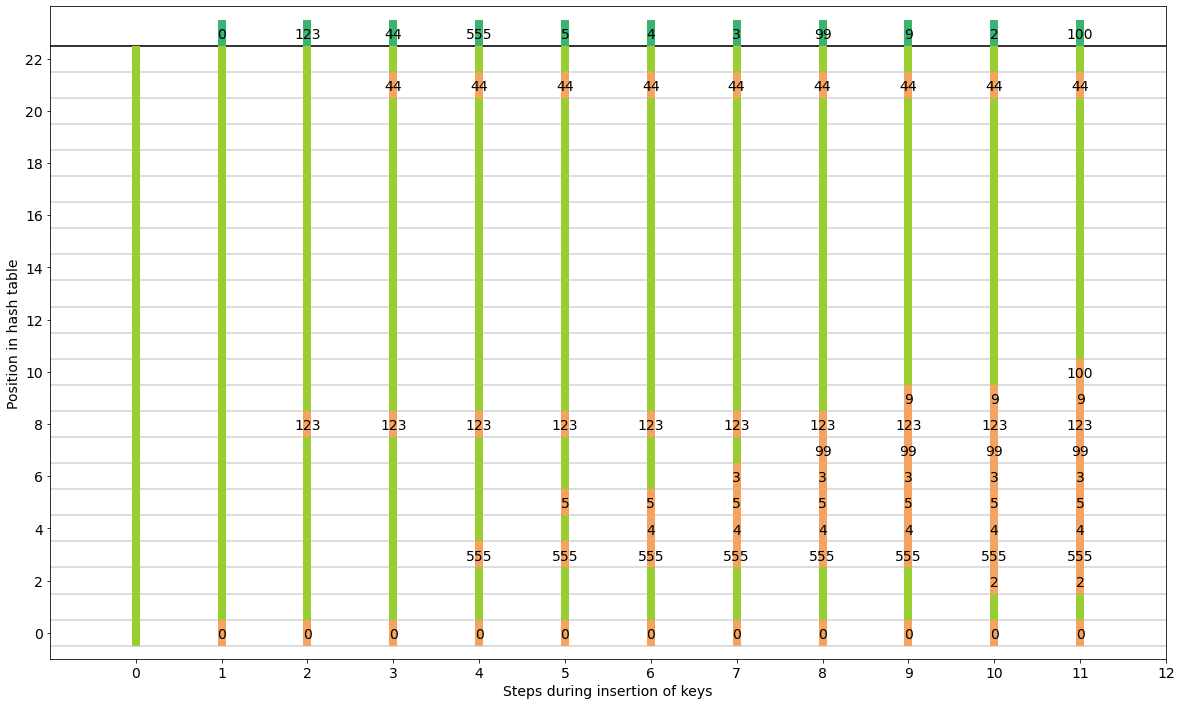

In [7]:
# insert some keys into the hash table (linear probing)
ARRAY_SIZE = 23
hash_table = list([None]*ARRAY_SIZE)
keys = [0, 123, 44, 555, 5, 4, 3, 99, 9, 2, 100]

steps=[]
steps.append([hash_table[:], None, None])
for k in keys:
    rc = insert_lin_probing(k)
    steps.append([hash_table[:], k, rc])
output_graphical_view()

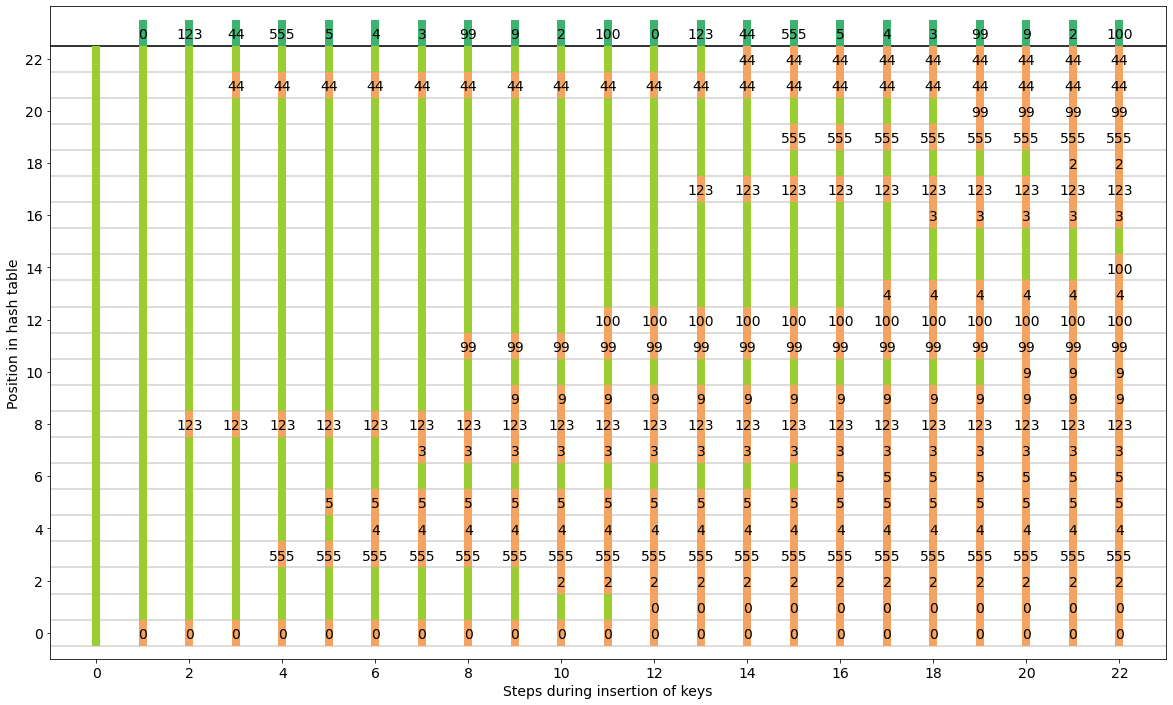

In [8]:
# insert some keys into the hash table (quadratic probing)
ARRAY_SIZE = 23
hash_table = list([None]*ARRAY_SIZE)
keys = [0, 123, 44, 555, 5, 4, 3, 99, 9, 2, 100, 0, 123, 44, 555, 5, 4, 3, 99, 9, 2, 100]

steps=[]
steps.append([hash_table[:], None, None])
for k in keys:
    rc = insert_quad_probing(k)
    steps.append([hash_table[:], k, rc])
output_graphical_view()

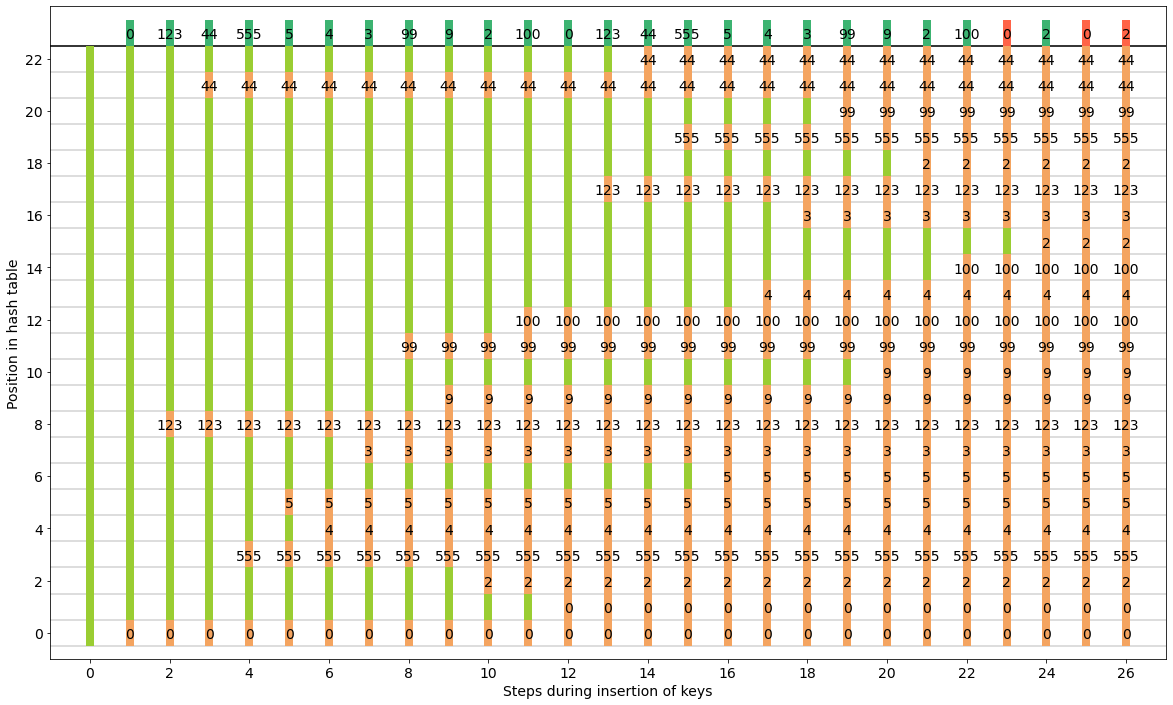

In [9]:
# insert some keys into the hash table (quadratic probing)
ARRAY_SIZE = 23
hash_table = list([None]*ARRAY_SIZE)
keys = [0, 123, 44, 555, 5, 4, 3, 99, 9, 2, 100, 0, 123, 44, 555, 5, 4, 3, 99, 9, 2, 100, 0, 2, 0, 2]

steps=[]
steps.append([hash_table[:], None, None])
for k in keys:
    rc = insert_quad_probing(k)
    steps.append([hash_table[:], k, rc])
output_graphical_view()

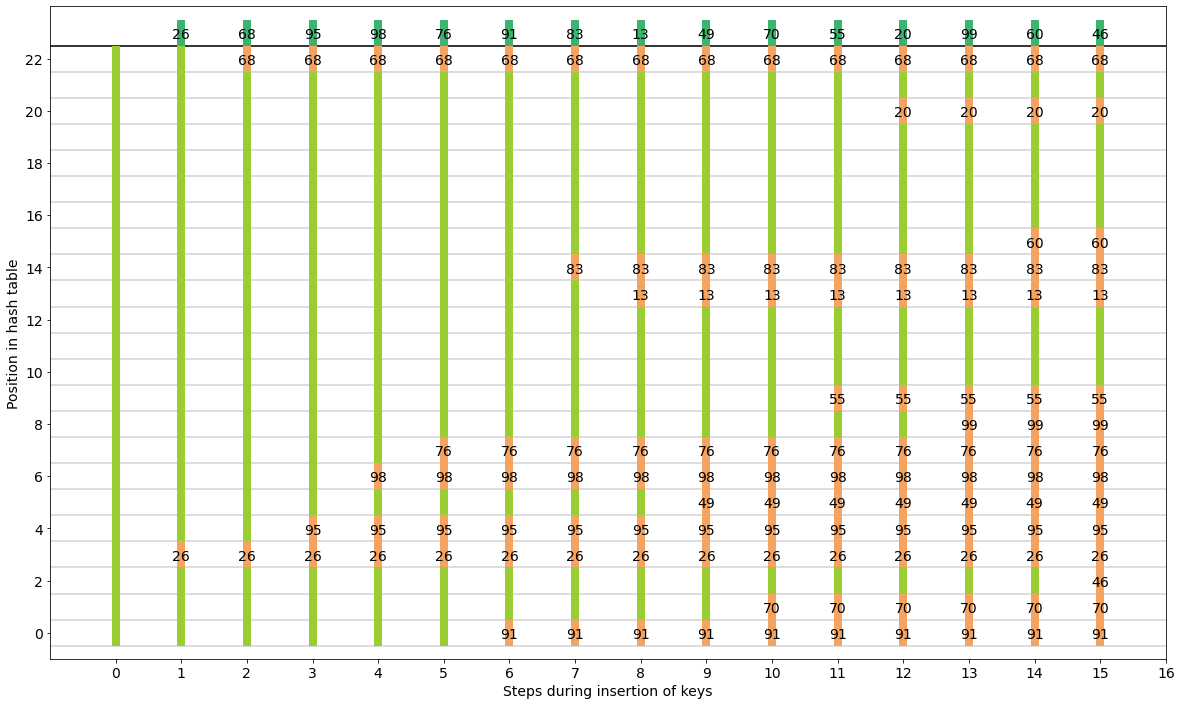

In [10]:
# insert some keys into the hash table (linear probing)
ARRAY_SIZE = 23
hash_table = list([None]*ARRAY_SIZE)
keys = [26, 68, 95, 98, 76, 91, 83, 13, 49, 70, 55, 20, 99, 60, 46]

steps=[]
steps.append([hash_table[:], None, None])
for k in keys:
    rc = insert_lin_probing(k)
    steps.append([hash_table[:], k, rc])
output_graphical_view()

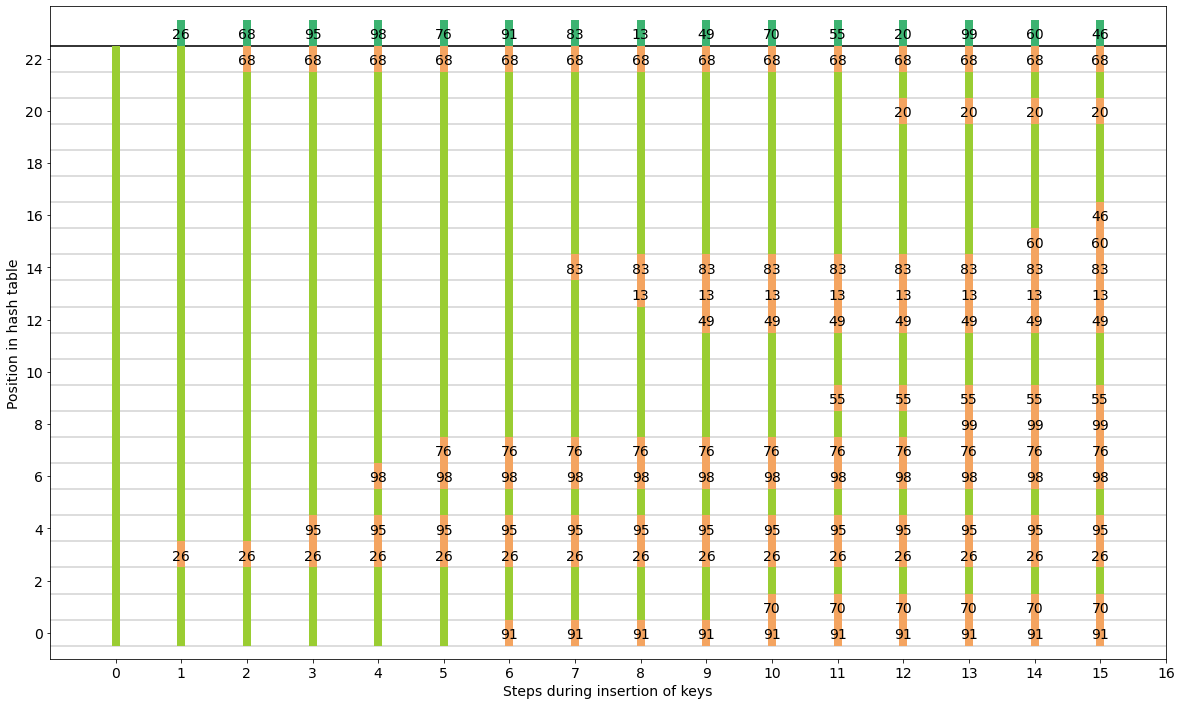

In [11]:
# insert some keys into the hash table (quadratic probing)
ARRAY_SIZE = 23
hash_table = list([None]*ARRAY_SIZE)
keys = [26, 68, 95, 98, 76, 91, 83, 13, 49, 70, 55, 20, 99, 60, 46]

steps=[]
steps.append([hash_table[:], None, None])
for k in keys:
    rc = insert_quad_probing(k)
    steps.append([hash_table[:], k, rc])
output_graphical_view()

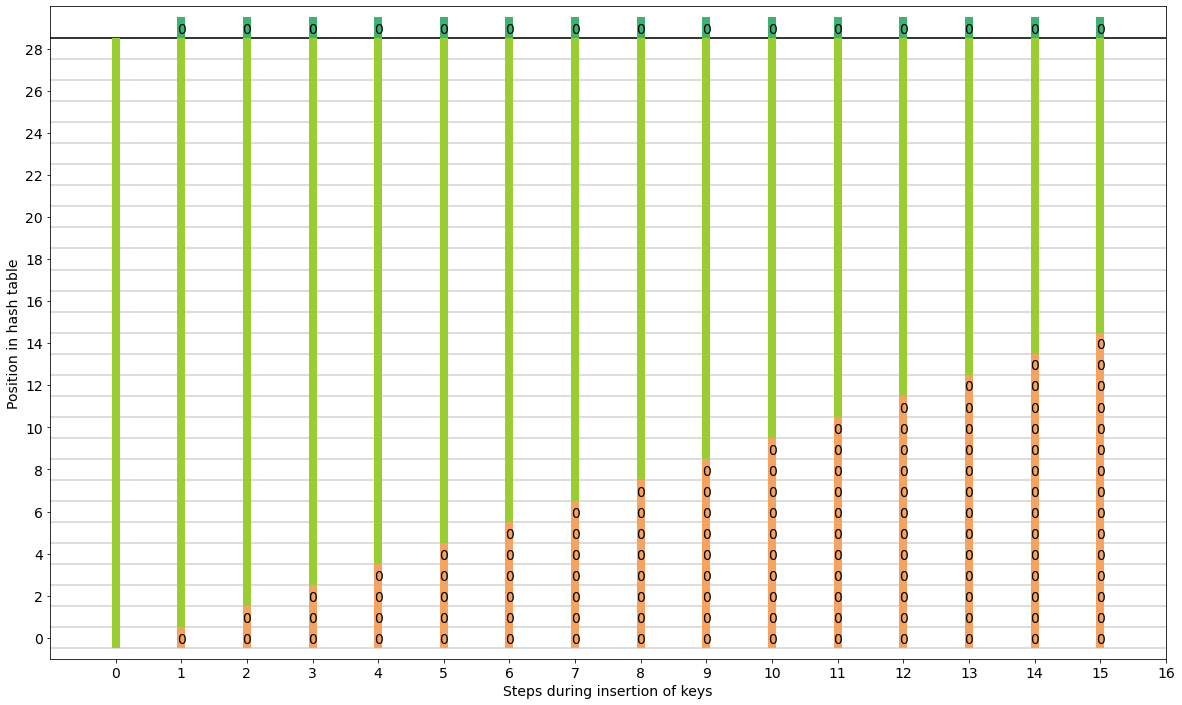

In [12]:
# insert some keys into the hash table (linear probing)
ARRAY_SIZE = 29
hash_table = list([None]*ARRAY_SIZE)
keys = [0]*15

steps=[]
steps.append([hash_table[:], None, None])
for k in keys:
    rc = insert_lin_probing(k)
    steps.append([hash_table[:], k, rc])
output_graphical_view()

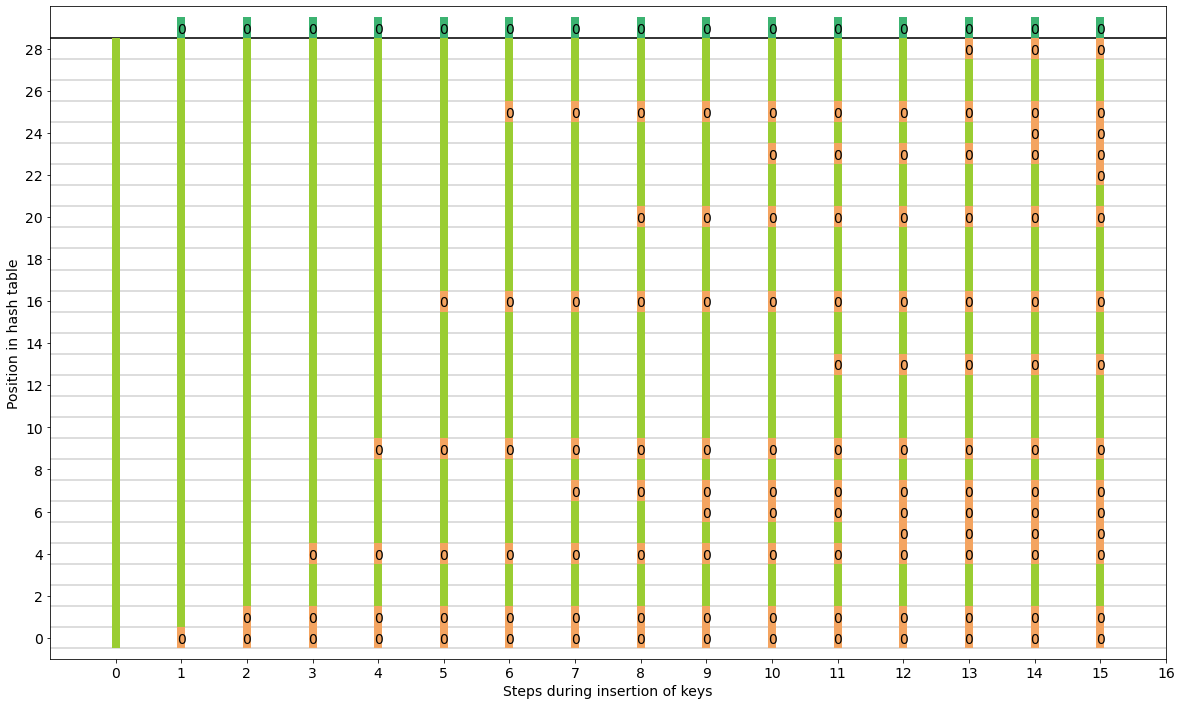

In [13]:
# insert some keys into the hash table (quadratic probing)
ARRAY_SIZE = 29
hash_table = list([None]*ARRAY_SIZE)
keys = [0]*15

steps=[]
steps.append([hash_table[:], None, None])
for k in keys:
    rc = insert_quad_probing(k)
    steps.append([hash_table[:], k, rc])
output_graphical_view()

### Your tests here ...

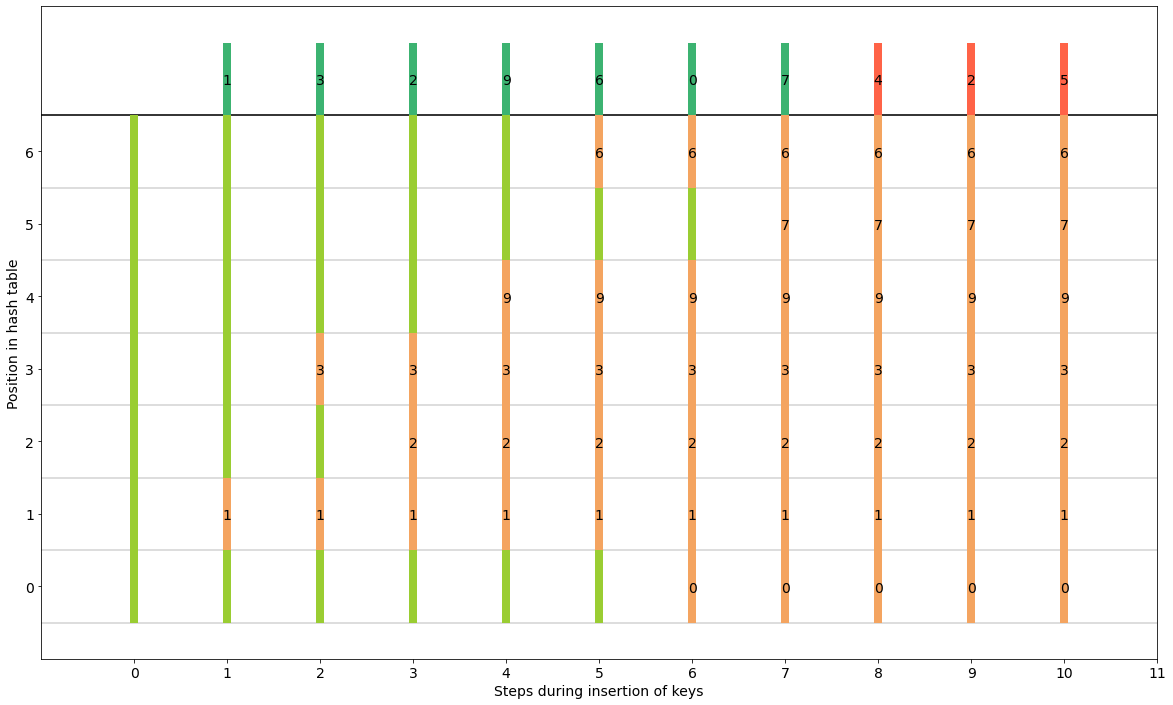

In [14]:
ARRAY_SIZE = 7
hash_table = list([None]*ARRAY_SIZE)
keys = [1, 3, 2, 9, 6, 0, 7, 4, 2, 5]

steps=[]
steps.append([hash_table[:], None, None])
for k in keys:
    rc = insert_lin_probing(k)
    steps.append([hash_table[:], k, rc])
output_graphical_view()

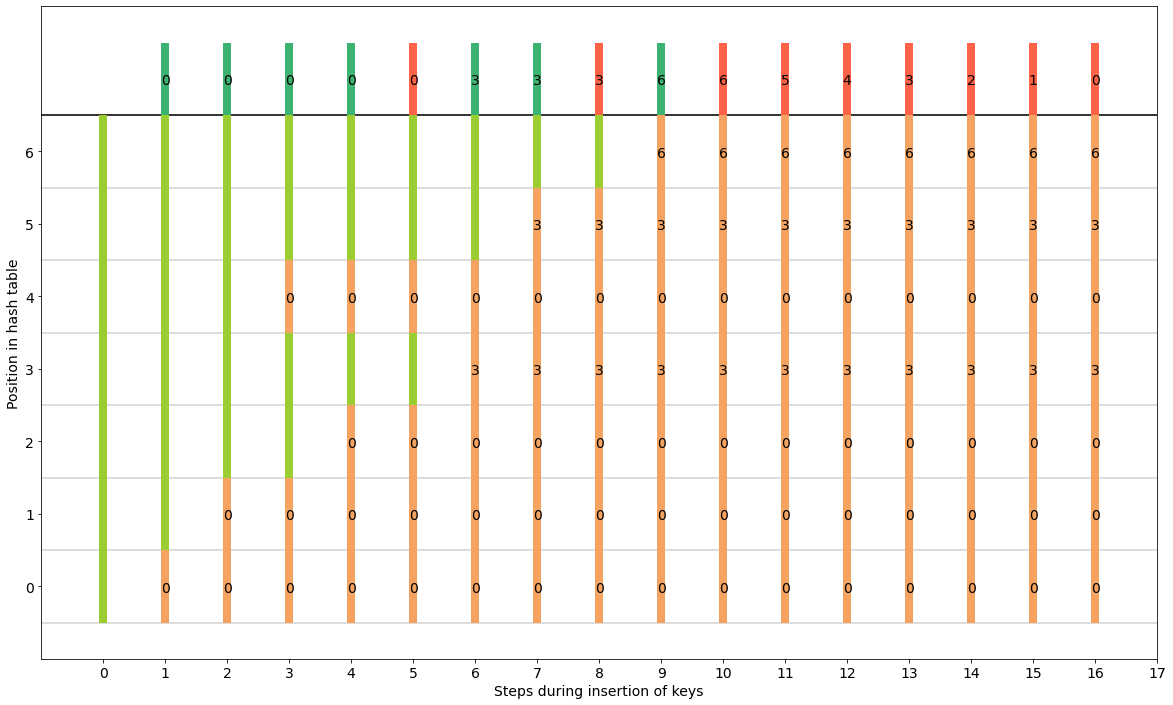

In [15]:
ARRAY_SIZE = 7
hash_table = list([None]*ARRAY_SIZE)
keys = [0, 0, 0, 0, 0, 3, 3, 3, 6, 6, 5, 4, 3, 2, 1, 0]

steps=[]
steps.append([hash_table[:], None, None])
for k in keys:
    rc = insert_quad_probing(k)
    steps.append([hash_table[:], k, rc])
output_graphical_view()

In [16]:
# ... and here ...